# Solution for Exercise Titanic

In [7]:
import pandas as pd
from sklearn import set_config
set_config(transform_output="pandas")

In [8]:
# Load the Titanic dataset "Dataset_titanic.csv" from Moodle into a Pandas DataFrame
titanic_df = pd.read_csv("/Users/muhammadraza/Documents/GitHub/BIPM/Data Science/Dataset_Titanic.csv")

In [9]:
# Analyze the missing data and the data types
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
# Save the features 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch' in a variable X 
# and the labels 'Survived' in a variable y
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch']
X = titanic_df[features]
y = titanic_df['Survived']


In [11]:
# Conduct a train-test split with a 30% test ratio and a random state of 42
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)

In [12]:
# Instantiate a Simple Imputer with a Median Strategy
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy="median")

In [13]:
# Instantiate a One Hot Encoder that ignores unknown categories
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [14]:
# Use a Column Transformer to apply the two transformers (Imputer and One-hot-encoder) to the 
# correct columns and pass through all other columns
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(
    [('ohe', ohe, ['Sex']), 
    ('imputer', imp, ['Age'])],              
    remainder='passthrough'
)

ct.fit_transform(X_train)

,ohe__Sex_female,ohe__Sex_male,imputer__Age,remainder__Pclass,remainder__SibSp,remainder__Parch
844,0.0,1.0,17.0,3,0,0
316,1.0,0.0,24.0,2,1,0
768,0.0,1.0,29.0,3,1,0
255,1.0,0.0,29.0,3,0,2
130,0.0,1.0,33.0,3,0,0
...,...,...,...,...,...,...
476,0.0,1.0,34.0,2,1,0
58,1.0,0.0,5.0,2,1,2
736,1.0,0.0,48.0,3,1,3
462,0.0,1.0,47.0,1,0,0


In [15]:
# Create a Decision Tree Classifier with Gini impurity as a splitting criterion
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='gini')

In [16]:
# Create a Pipeline with two steps: preprocessing (Column Transformer) and classifier
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('preprocessor', ct),
    ('classifier', clf)]
)

pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Sex']),
                                                 ('imputer',
                                                  SimpleImputer(strategy='median'),
                                                  ['Age'])])),
                ('classifier', DecisionTreeClassifier())])

In [17]:
# Train the Pipeline on the train set
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Sex']),
                                                 ('imputer',
                                                  SimpleImputer(strategy='median'),
                                                  ['Age'])])),
                ('classifier', DecisionTreeClassifier())])

In [18]:
# Predict the labels for the test set
y_pred = pipe.predict(X_test)

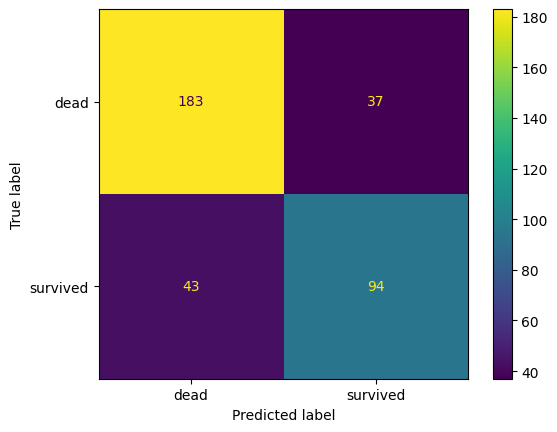

In [19]:
# Create a confusion matrix that compares the predicted labels with the correct labels of the test set
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

display_labels=['dead', 'survived']
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=display_labels)
disp.plot()
plt.show()

In [20]:
# Print a classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       220
           1       0.72      0.69      0.70       137

    accuracy                           0.78       357
   macro avg       0.76      0.76      0.76       357
weighted avg       0.77      0.78      0.77       357



In [25]:
params = {
    "classifier__max_depth": range(1, 12),
    "classifier__criterion": ["gini", "entropy"]
}

In [ ]:
# How do we knowchange the hyper paramters for the classifier within the pipeline?

# Using "classifier __"

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
opt_clf = GridSearchCV(pipe, params, scoring = 'accuracy', n_jobs = -1, cv = 10, verbose=1, return_train_score=True)

In [28]:
opt_clf.fit(X_train, y_train)

Fitting 10 folds for each of 22 candidates, totalling 220 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['Sex']),
                                                                        ('imputer',
                                                                         SimpleImputer(strategy='median'),
                                                                         ['Age'])])),
                                       ('classifier',
                                        DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_depth': range(1, 12)},
             return_train_score=True, scoring='accuracy', verbose=1)

In [29]:
y_pred = opt_clf.predict(X_test)

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.93      0.85       220
           1       0.83      0.58      0.68       137

    accuracy                           0.79       357
   macro avg       0.81      0.75      0.76       357
weighted avg       0.80      0.79      0.78       357



In [31]:
# Which was the best parameter?

opt_clf.best_params_

{'classifier__criterion': 'entropy', 'classifier__max_depth': 4}

In [32]:
best_model = opt_clf.best_estimator_

In [39]:
cv_results = pd.DataFrame(opt_clf.cv_results_).columns

In [40]:
cv_results

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_classifier__criterion', 'param_classifier__max_depth', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'split5_test_score',
       'split6_test_score', 'split7_test_score', 'split8_test_score',
       'split9_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score', 'split0_train_score', 'split1_train_score',
       'split2_train_score', 'split3_train_score', 'split4_train_score',
       'split5_train_score', 'split6_train_score', 'split7_train_score',
       'split8_train_score', 'split9_train_score', 'mean_train_score',
       'std_train_score'],
      dtype='object')

In [41]:
import seaborn as sns

<Axes: >

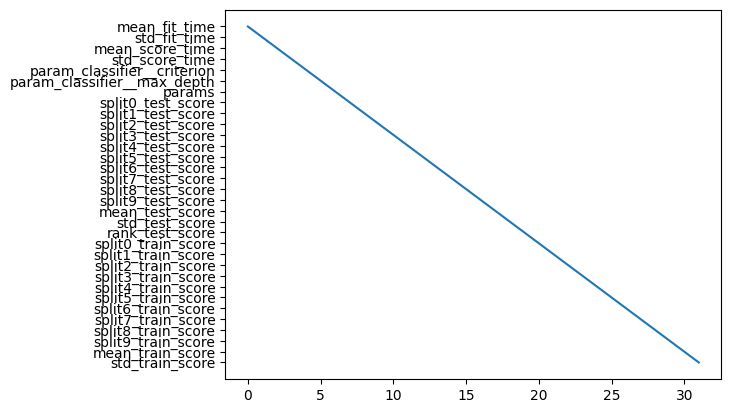

In [42]:
sns.lineplot(cv_results, x = "param_classifier__max_depth"
                , y = 